In [158]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [6]:
data = pd.DataFrame(x, columns=['A', 'B', 'C', 'D'])
data['target'] = y

In [9]:
data = data.drop(['C', 'D'], axis=1)

In [12]:
data = data[data['target'].isin([0, 1])]

In [14]:
scatter1 = data[data['target'] == 1]
scatter2 = data[data['target'] == 0]

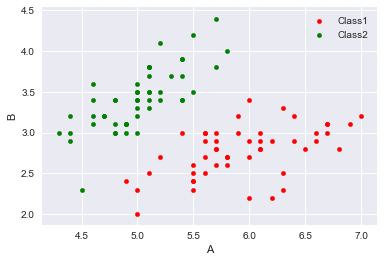

In [17]:
ax = scatter1.plot.scatter(x='A', y ='B', color='red', label='Class1')
scatter2.plot.scatter(x='A', y ='B', color='green', label='Class2', ax=ax)
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
A         100 non-null float64
B         100 non-null float64
target    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [68]:
m = data.shape[0]

In [67]:
X = data[['A', 'B']]
X_tmp = []
for i in range(data.shape[0]):
    X_tmp.append(X.loc[i].tolist())
X = np.array(X_tmp)

In [64]:
y = np.transpose(np.array([data.target.tolist()]))

K-fold: divides all the samples in k groups of samples, called folds, of equal sizes. The prediction function is learned using k-1 folds, and the fold left out is used for tested.

In [157]:
kf = KFold(n_splits=10)
error = []
for train, test in kf.split(data):
    theta = logistic_regression(X[train], y[train])

    X_test = X[test][:]
    m = X_test.shape[0]
    tmp = np.ones((m))
    X_test = np.insert(X[test], 0, values=tmp, axis=1)
    h = sigmoid(np.dot(X_test, theta))
    error.append((sum((h- y[test])**2)/m)[0])

error_mean = sum(error)/len(error)
print error_mean

0.0163080499778


Leave-one-out is a simple cross-validation.

In [160]:
loo = LeaveOneOut()
error = []
for train, test in loo.split(data):
    theta = logistic_regression(X[train], y[train])

    X_test = X[test][:]
    m = X_test.shape[0]
    tmp = np.ones((m))
    X_test = np.insert(X[test], 0, values=tmp, axis=1)
    h = sigmoid(np.dot(X_test, theta))
    error.append((sum((h- y[test])**2)/m)[0])

error_mean = sum(error)/len(error)
print error_mean

0.0142020893443


In [24]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [92]:
def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    m = X.shape[0]
    cost = -(np.dot(np.transpose(y), np.log(h)) + np.dot(np.transpose(1-y), np.log(1-h)))/m
    return cost

In [138]:
def logistic_regression(X, y):
    theta = np.zeros((3, 1))
    echo = 5000
    alpha = 0.001
    
    tmp = np.ones((X.shape[0]))
    X = np.insert(X, 0, values=tmp, axis=1)
    cost_list = []
    for i in range(echo):
        h = sigmoid(np.dot(X, theta))
        theta = theta + alpha*np.dot(np.transpose(X), y-h)
        cost_list.append(cost(theta, X, y)[0][0])
        
    return theta

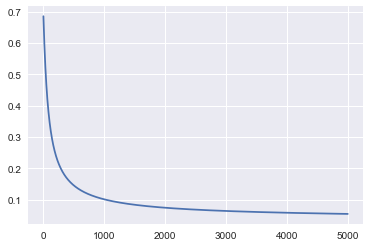

In [117]:
cost_list, theta = logistic_regression(X, y)
plt.plot(cost_list)